In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
origin = pd.read_csv("../dataset/results-2021-12-18.csv")
origin

,algorithm,RQ,experiment_id,iteration,no_datapoints,no_features,preprocessing_energy(J),preprocessing_time(s),train_energy(J),train_time(s),predict_energy(J),predict_time(s),datatype,accuracy,precision,recall,f1
0,AdaBoost,2.1,103,2,2730,8169,0.012593,1.638312,1.037993,2.012923,0.043739,1.489494,float64,0.960684,0.893617,0.802548,0.845638
1,Decision Tree,2.2,33,2,3900,2451,0.027051,1.431261,0.068482,1.506254,0.064431,1.478886,float64,0.963517,0.872146,0.852679,0.862302
2,SVM,2.2,15,22,3900,4084,0.018298,1.467225,0.530155,1.941215,0.303603,1.687695,float64,0.828349,0.431965,0.892857,0.582242
3,AdaBoost,2.2,112,1,3900,1633,0.026226,1.454106,0.243067,1.780723,0.093800,1.514068,float64,0.970096,0.910377,0.861607,0.885321
4,Bagging Classifier,2.2,138,6,3900,6535,0.027610,1.476311,0.699298,2.067553,0.056580,1.496940,float64,0.964115,0.910000,0.812500,0.858491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Random Forest,2.2,96,2,3900,4901,0.025976,1.473068,1.501089,2.928194,0.082175,1.543079,float64,0.978469,0.989583,0.848214,0.913462
3596,Bagging Classifier,2.1,126,20,1559,8169,0.006985,1.440221,0.170978,1.651912,0.037567,1.460747,float64,0.952167,0.926471,0.700000,0.797468
3597,SVM,2.2,17,19,3900,5718,0.090063,1.408732,1.108957,2.026484,0.488150,1.690740,float64,0.828349,0.431965,0.892857,0.582242
3598,Random Forest,2.1,86,18,1559,8169,0.007155,1.437659,0.581876,2.033274,0.046828,1.480216,float64,0.955157,1.000000,0.666667,0.800000


In [3]:
cols_needed = ["algorithm", "RQ", "no_datapoints", "no_features", "train_energy(J)"]
data_needed = origin[cols_needed]
conv_energy_avg = data_needed.groupby(cols_needed[:-1]).mean()[cols_needed[-1]]
list_energy_avg = [[a, r, d, f, e] for (a, r, d, f), e in conv_energy_avg.items()]
data_energy_avg = pd.DataFrame(list_energy_avg, columns=cols_needed)
data_energy_avg

,algorithm,RQ,no_datapoints,no_features,train_energy(J)
0,AdaBoost,2.1,389,8169,0.113206
1,AdaBoost,2.1,779,8169,0.181939
2,AdaBoost,2.1,1169,8169,0.292226
3,AdaBoost,2.1,1559,8169,0.294380
4,AdaBoost,2.1,1950,8169,0.393638
...,...,...,...,...,...
115,SVM,2.2,3900,4901,0.763848
116,SVM,2.2,3900,5718,0.527261
117,SVM,2.2,3900,6535,0.509580
118,SVM,2.2,3900,7352,0.624900


In [4]:
data_needed

,algorithm,RQ,no_datapoints,no_features,train_energy(J)
0,AdaBoost,2.1,2730,8169,1.037993
1,Decision Tree,2.2,3900,2451,0.068482
2,SVM,2.2,3900,4084,0.530155
3,AdaBoost,2.2,3900,1633,0.243067
4,Bagging Classifier,2.2,3900,6535,0.699298
...,...,...,...,...,...
3595,Random Forest,2.2,3900,4901,1.501089
3596,Bagging Classifier,2.1,1559,8169,0.170978
3597,SVM,2.2,3900,5718,1.108957
3598,Random Forest,2.1,1559,8169,0.581876


In [5]:
def norm(seq):
    return seq / max(seq)

In [6]:
def draw_tree_left(axes, data, x, y, pos, color_trunk, color_branch):
    markerline, stemlines, baseline = axes.stem(
        data[y], pos + 0.8 * norm(data[x]), bottom=pos, linefmt=color_branch)
    markerline.set_color(color_branch)
    baseline.set_color(color_trunk)
    # orientation="horizontal"

In [7]:
def draw_tree_right(axes, data, x, y, pos, color_trunk, color_branch):
    markerline, stemlines, baseline = axes.stem(
        data[y], pos - 0.8 * norm(data[x]), bottom=pos, linefmt=color_branch)
    markerline.set_color(color_branch)
    baseline.set_color(color_trunk)

In [8]:
def draw_tree(axes, data_left, data_right, label_left, label_right, label_branch, pos, color_trunk, color_left, color_right):
    draw_tree_left(axes, data_left, label_left, label_branch, pos, color_trunk, color_left)
    draw_tree_right(axes, data_right, label_right, label_branch, pos, color_trunk, color_right)

In [9]:
def draw_forest(axes, data, judge, judge_left, judge_right, label_trees, label_left, label_right, label_trunk, color_trunk, color_left, color_right):
    data_left_groups = data[data[judge] == judge_left].groupby(label_trees)
    data_right_groups = data[data[judge] == judge_right].groupby(label_trees)
    name_trunks = data[label_trees].value_counts().index
    
    for index, algo in enumerate(name_trunks):
        data_left, data_right = data_left_groups.get_group(algo), data_right_groups.get_group(algo)
        draw_tree(axes, data_left, data_right, label_left, label_right, label_trunk, index * 2, color_trunk, color_left, color_right)
    
    axes.set_yticks([x * 2 for x in range(len(name_trunks))])
    axes.set_yticklabels(name_trunks)
    
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.set_xlabel(label_trunk)
    axes.set_ylabel(label_trees, rotation='horizontal', ha='right', y=1, va='bottom')
    
    custom_lines = [Line2D([0], [0], color=color_left, lw=4), Line2D([0], [0], color=color_right, lw=4)]
    ax.legend(custom_lines, [label_left, label_right])

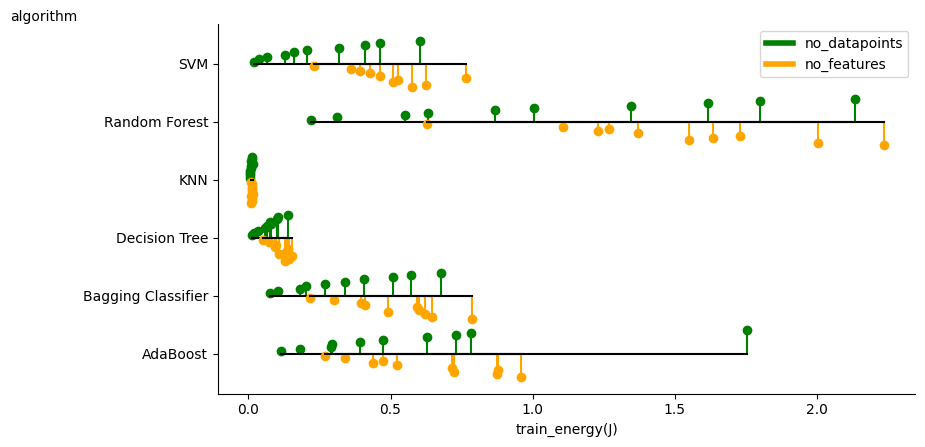

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
draw_forest(ax, data_energy_avg, "RQ", 2.1, 2.2, "algorithm", "no_datapoints", "no_features", "train_energy(J)", "black", "green", "orange")